Gerekli kütüphanelerin yüklenmesi

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Netflix veri setinin yüklenmesi (netflix_titles.csv)


In [ ]:
netflix = netflix=pd.read_csv('netflix_titles.csv')

İlk 10 satırı ekrana verelim ve veri setimizi inceleyelim.


In [ ]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


Veri setinin boyutunu inceleyelim.

In [ ]:
netflix.shape

(6234, 12)

Veri setinde 12 sütun ve 6234 satır olduğunu öğrendik. Veri setinde bulunan sütunların isimlerini ekrana verelim.

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Veri setinde NULL değerlerin olup olmadığınını kontrol edelim.

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Veri setinde yönetmen sütununda (director) 1969 satırın, oyuncu sütununda (cast) 570 satırın, ülke sütununda (country) 476 satırın, eklenme tarihi sütununda (date_added) 11 satırın, reyting sütununda (rating) 10 satırın NULL değerlerden oluştuğu görülmektedir.

Şimdi de veri setindeki tekil değerlerin sayısını ekrana verelim.

In [ ]:
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

Veri setinde tekrarlanmış veri olup olmadığını inceleyelim.

In [ ]:
netflix.duplicated().sum()

0

Veri setinde tekrarlanmış (duplike) veri bulunmamaktadır. 

Veri setinin bir kopyasını oluşturalım.

In [ ]:
df = netflix.copy()

Kopya veri setindeki NULL değerlere sahip satırları düşürelim ve yeni veri setinin boyutunu ekrana verelim.

In [ ]:
df=df.dropna()
df.shape

(3774, 12)

Veri setindeki Netflix içeriklerinin türünü (type sütunu) inceleyelim. type sütununda iki tekil öznitelik bulunmaktadır: Filmler (Movies) ve TV gösterileri (TV shows). Bu sütun üzerinde seaborn veri görselleştirme kütüphanesinin countplot fonksiyonu ile bu özniteliklerin sayılarını sütun grafiğine dökelim. seaborn kütüphanesi sns olarak kısaltılmıştı. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'İçerik Türü')

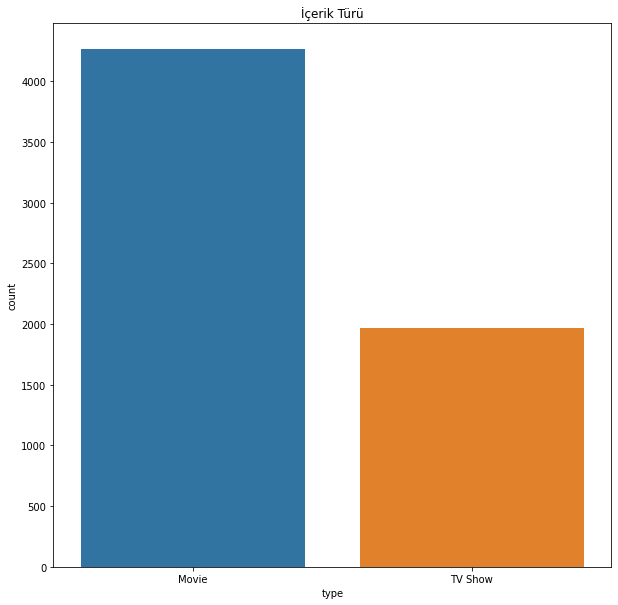

In [ ]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('İçerik Türü')

Aynı bilgiyi pasta grafiğinde görelim. Bunun için matplotlib kütüphanesinin plot.pie fonksiyonunu kullanalım. 

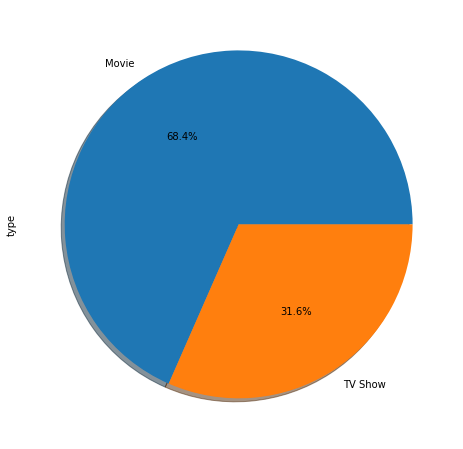

In [ ]:
netflix['type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Ülkeleri ürettikleri içerik sayısı açısından sıralayalım. Bunun için pandas kütüphanesinde yeni bir veri çerçevesi oluşturalım. `pd.DataFrame` fonksiyonunu kullanalım. Argüman olarak. `value_counts()` metodunu kullanalım. Yeni veri çerçevesinin sütun isimlerini de "country" ve "count" olarak tayin edelim. 

In [ ]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,1323
1,India,707
2,United Kingdom,152
3,Canada,78
4,Spain,72


Hangi tarihlerde en çok içeriğin Netflix havuzuna eklendiğini  sıralayalım. Bunun için pandas kütüphanesinde yeni bir veri çerçevesi oluşturalım. `pd.DataFrame` fonksiyonunu kullanalım. Argüman olarak. `value_counts()` metodunu kullanalım. Yeni veri çerçevesinin sütun isimlerini de "Date" ve "Count" olarak tayin edelim. 

In [ ]:
date = pd.DataFrame(df.date_added.value_counts().reset_index().values, columns=["Date", "Count"])
date.head()

,Date,Count
0,"January 1, 2020",105
1,"November 1, 2019",73
2,"March 1, 2018",70
3,"December 31, 2019",64
4,"October 1, 2018",61


Netflix veri setindeki yayınlanmış en eski 15 içeriği ekrana verelim. Bunun için pandas kütüphanesinin `sort_values` fonksiyonunu kullanalım. Ekrana verme işleminde ise, yayın tarihine göre sıralanmış veri çerçevesinin (`eski`) başlık (`title`) ve yayınlanma tarihi (`release_year`) sütunlarını ekrana verelim. 

In [ ]:
eski = df.sort_values("release_year", ascending = True)
eski[['title', "release_year"]][:15]

,title,release_year
2013,The Battle of Midway,1942
2021,Tunisian Victory,1944
2005,Know Your Enemy - Japan,1945
2930,The Stranger,1946
2006,Let There Be Light,1946
2020,Thunderbolt,1947
2981,White Christmas,1954
1401,Rebel Without a Cause,1955
1369,Forbidden Planet,1956
1354,Cat on a Hot Tin Roof,1958


Netflix içeriklerinin en çok listelendiği grupları `listed_in` sütunu üzerinde `value_counts()` yöntemi ile saydıralım. En çok gruplamanın yapıldığı 10 özniteliği ekrana verelim. 

In [ ]:
favori_listeleme=netflix["listed_in"].value_counts()[0:9]
print(favori_listeleme)

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Comedies, International Movies                      120
Name: listed_in, dtype: int64


Netflix veri setinde Hindistan tarafından üretilmiş içerikleri filtreleyelim ve ilk beş içeriği ekrana verelim.

In [ ]:
hindistan_icerikleri = netflix[netflix["country"] == "India"]
hindistan_icerikleri.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125 min,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
37,81052275,Movie,Ee Nagaraniki Emaindi,Tharun Bhascker,"Vishwaksen Naidu, Sushanth Reddy, Abhinav Goma...",India,"September 6, 2019",2018,TV-14,133 min,"Comedies, International Movies","In Goa and in desperate need of cash, four chi..."
41,70303496,Movie,PK,Rajkumar Hirani,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",India,"September 6, 2018",2014,TV-14,146 min,"Comedies, Dramas, International Movies",Aamir Khan teams with director Rajkumar Hirani...
58,81155784,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,"September 4, 2019",2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b..."
99,80225885,TV Show,Bard of Blood,NaN,"Emraan Hashmi, Viineet Kumar, Sobhita Dhulipal...",India,"September 27, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Years after a disastrous job in Balochistan, a..."


Hindistan içeriklerinin eklenme tarihlerini filtreleyelim ve NumPy dizisi haline getirelim. Bu dizinin max ve min değerlerini inceleyerek, bu içeriklerin eklenme yıllarını on yıllara göre dağılımını sağlayan bir matplotlib histogramı çizdirelim. 

<class 'numpy.ndarray'>
1959
2020


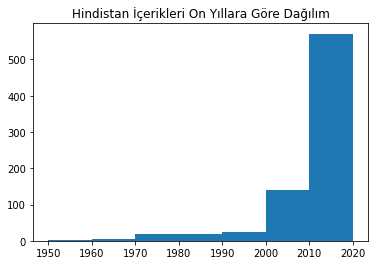

In [ ]:
hindistan_eklenme = hindistan_icerikleri['release_year'].to_numpy()
print(type(hindistan_eklenme))
print(min(hindistan_eklenme))
print(max(hindistan_eklenme))
plt.hist(hindistan_eklenme, bins = [1950,1960,1970,1980,1990,2000,2010,2020]) 
plt.title("Hindistan İçerikleri On Yıllara Göre Dağılım") 
plt.show()


Netflix veri setindeki 2019 tarihli içerikleri `release_year` sütununu filtreleyerek tespit edelim. Bu filtrelenmiş çerçeve üzerinden Türkiye adresli içerikleri ekrana verelim. 

In [ ]:
netflix_2019 = netflix[netflix['release_year'] == 2019]
netflix_2019_turkey = netflix_2019[netflix_2019['country'] == 'Turkey']
netflix_2019_turkey

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
455,81158574,Movie,Brother in Love,Onur Bilgetay,"Cem Gelinoğlu, Melis Babadag, Ege Kökenli, Müf...",Turkey,"October 4, 2019",2019,TV-14,110 min,"Comedies, International Movies, Romantic Movies",A robbery leaves a proprietor penniless before...
457,81132440,Movie,Kids on the Block,Tugçe Soysop,"Selim Bayraktar, Berat Efe Parlar, Esat Polat ...",Turkey,"October 4, 2019",2019,TV-PG,102 min,"Children & Family Movies, Comedies",When their fun in the park is threatened by a ...
4329,81037848,TV Show,The Gift,NaN,"Beren Saat, Mehmet Günsür, Metin Akdülger, Mel...",Turkey,"December 27, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A painter in Istanbul embarks on a personal jo...
5287,81076251,Movie,Money Trap,Yılmaz Erdoğan,"Yılmaz Erdoğan, Kıvanç Tatlıtuğ, Ezgi Mola, Be...",Turkey,"April 26, 2019",2019,TV-MA,122 min,"Comedies, Dramas, International Movies",When his daughter and son-in-law fall prey to ...
5752,81086462,TV Show,The Yard,NaN,"Demet Evgar, Ceren Moray, Nursel Köse, Kenan E...",Turkey,"November 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas","After a fateful domestic clash, a devoted moth..."
6198,80189829,TV Show,The Protector,NaN,"Çağatay Ulusoy, Ayça Ayşin Turan, Hazar Ergüçl...",Turkey,"April 26, 2019",2019,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Discovering his ties to a secret ancient order...
